In [39]:
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import cv2  # importing cv
import imutils
import glob
from PIL import Image, ImageOps

#We need these in this file:
import sys
sys.path.append('cropping')
import load_read_name_extractor as lrne

In [40]:
def it_hog(img_list, ori, ppc, cpb, bn):
    hog_features = []
    temp_list = []
    for i in range (len(img_list)): #For some reason after running this code 100 times it finds an index error therefore -1
        print(img_list[i].shape, i)
        temp_list.append(color.rgb2gray(img_list[i]))
        fd, hog_image = hog(temp_list[i], orientations=ori, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, block_norm=bn)
        temp_list[i] = hog_image
        hog_features.append(fd)
    return temp_list, hog_features

In [41]:
def mirror_each(img):
    mirror = cv2.flip(img,1)
    flip = cv2.flip(img,0)
    mirror_flip = cv2.flip(mirror,0)
    return [mirror, flip, mirror_flip]

def expand_with_mirror(img_list, names):
    temp_img_list = []
    temp_names = []
    for i in range(len(img_list)):
        mirrors = mirror_each(img_list[i])
        temp_img_list.append(img_list[i])
        temp_names.append(names[i])
        for j in range(len(mirrors)):
            temp_img_list.append(mirrors[j])
            temp_names.append(names[i])
    return temp_img_list, temp_names

        



In [42]:
img_list, names = lrne.load_name_and_img("cropped_72_248/*.jpeg")

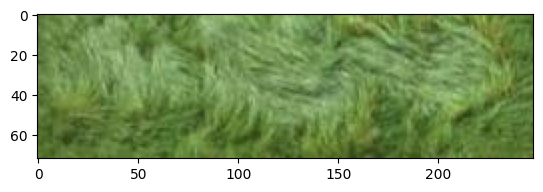

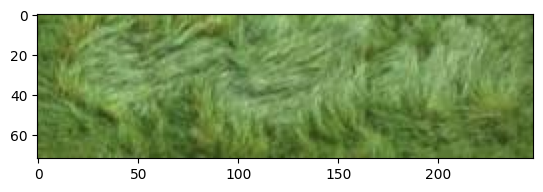

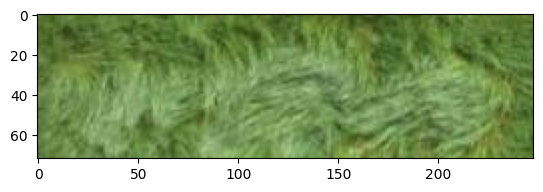

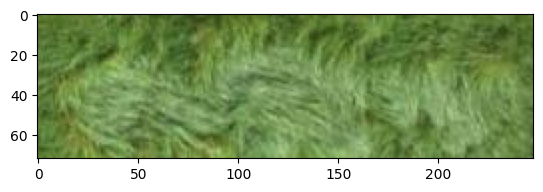

In [43]:
mirrors = mirror_each(img_list[0])
plt.imshow(img_list[0])
plt.show()
for img in mirrors:
    plt.imshow(img)
    plt.show()


In [44]:
cpb = 4
for i in range (4,5):
    img_shape = img_list[0].shape
    ori=9
    ppc=(8,8)
    cpb=(i,i)
    bn="L2"
    mir = True
    if mir == True:
        img_list_t, names_t = expand_with_mirror(img_list, names)
        xxx, features = it_hog(img_list_t, ori=9, ppc=ppc, cpb=cpb, bn=bn)
        iteration = str(img_shape)+"_cells_"+str(ppc)+"_block_"+str(cpb)+"_norm_"+str(bn) + "_mir_" + str(mir)
        lrne.save_in_txt(names_t, "features/img_names_" + iteration)
        lrne.save_in_txt(features, "features/hog_features_" + iteration)
    else:
        xxx, features = it_hog(img_list, ori=9, ppc=ppc, cpb=cpb, bn=bn)
        iteration = str(img_shape)+"_cells_"+str(ppc)+"_block_"+str(cpb)+"_norm_"+str(bn) + "_mir_" + str(mir)
        lrne.save_in_txt(names, "features/img_names_" + iteration)
        lrne.save_in_txt(features, "features/hog_features_" + iteration)
    

(72, 248, 3) 0
(72, 248, 3) 1
(72, 248, 3) 2
(72, 248, 3) 3
(72, 248, 3) 4
(72, 248, 3) 5
(72, 248, 3) 6
(72, 248, 3) 7
(72, 248, 3) 8
(72, 248, 3) 9
(72, 248, 3) 10
(72, 248, 3) 11
(72, 248, 3) 12
(72, 248, 3) 13
(72, 248, 3) 14
(72, 248, 3) 15
(72, 248, 3) 16
(72, 248, 3) 17
(72, 248, 3) 18
(72, 248, 3) 19
(72, 248, 3) 20
(72, 248, 3) 21
(72, 248, 3) 22
(72, 248, 3) 23
(72, 248, 3) 24
(72, 248, 3) 25
(72, 248, 3) 26
(72, 248, 3) 27
(72, 248, 3) 28
(72, 248, 3) 29
(72, 248, 3) 30
(72, 248, 3) 31
(72, 248, 3) 32
(72, 248, 3) 33
(72, 248, 3) 34
(72, 248, 3) 35
(72, 248, 3) 36
(72, 248, 3) 37
(72, 248, 3) 38
(72, 248, 3) 39
(72, 248, 3) 40
(72, 248, 3) 41
(72, 248, 3) 42
(72, 248, 3) 43
(72, 248, 3) 44
(72, 248, 3) 45
(72, 248, 3) 46
(72, 248, 3) 47
(72, 248, 3) 48
(72, 248, 3) 49
(72, 248, 3) 50
(72, 248, 3) 51
(72, 248, 3) 52
(72, 248, 3) 53
(72, 248, 3) 54
(72, 248, 3) 55
(72, 248, 3) 56
(72, 248, 3) 57
(72, 248, 3) 58
(72, 248, 3) 59
(72, 248, 3) 60
(72, 248, 3) 61
(72, 248, 3) 62
(7

In [45]:
#hog_features_load = np.load('hog_feutures.npy', allow_pickle=True)
#names_load = np.load('img_names_hog.npy', allow_pickle=True)
#mnaes_load[0]